<a href="https://colab.research.google.com/github/italomarcelogit/python-dicas-pandas/blob/main/Tutorial_de_Pandas_Dataframes_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tutorial de Pandas: Dataframes em Python**
**Comandos e Dicas**

Autor: **Italo Marcelo** - [LinkedIn](https://www.linkedin.com/in/italomarcelo/) | [Github](https://github.com/italomarcelogit)


O objetivo deste notebook é somente compartilhar com profissionanis que estão iniciando sua carreira em dados em python, comandos muito úteis e populares no dia a dia de um analista de dados, utilizando dataframes do Pandas.

Aqui você encontrará tudo sobre o Pandas http://pandas.pydata.org**, não somente sobre DataFrame mas outros ricos recursos que o Pandas pode proporcionar para o dia a dia de um analista de dados.

# **Importar o pandas**

Para utilizar o pandas no python, primeiramente temos que importar a biblioteca no python. Caso ela não esteja instalada em seu ambiente, utilize o comando **pip install pandas** no console ou em caso de notebooks o comando previamente terá um sinal de exclamação **! pip install pandas**.

In [1]:
# se a biblioteca não existir, descomente e execute a linha abaixo
# !pip install pandas

# importando a lib do Pandas
import pandas as pd
# importando a lib Numpy
import numpy as np

# **Criar um dataframe**

DataFrame é uma estrutura parecida com uma matriz, sendo que suas colunas ou linhas podem receber seus nomes e conter dados com tipos diferentes.
Fazendo uma analogia bem simples, imagine uma planilha onde cada linha equivale a um registro e cada coluna, seus atributos. Mas acredite, um DataFrame pode ser muito mais do que somente um ***Tidy Data*** ou matriz de dados.

Podemos criar um dataframe de várias maneiras, utilizando a função .DataFrame(), de acordo com a necessidade e criativade do desenvolvedor. 

De forma simples, vamos construí-lo manualmente conforme os exemplos abaixo:

## Utilizando um array Numpy

In [2]:
dados = np.array([np.random.randint(1, 10, 2), np.random.randint(11,20, 2)])
dados

array([[ 2,  4],
       [17, 19]])

In [3]:
df = pd.DataFrame(dados, columns=['Coluna 1', 'Coluna 2'])
df

,Coluna 1,Coluna 2
0,2,4
1,17,19


## Utilizando um dicionário

In [4]:
dicionario = {
     "Coluna 1": [1, 2, 3, 4, 5], 
     "Coluna 2": ['A', 'B', 'C','D', 'E']   
}
dicionario

{'Coluna 1': [1, 2, 3, 4, 5], 'Coluna 2': ['A', 'B', 'C', 'D', 'E']}

In [5]:
df = pd.DataFrame(dicionario)
df

,Coluna 1,Coluna 2
0,1,A
1,2,B
2,3,C
3,4,D
4,5,E


## Coluna a Coluna

In [6]:
# e uma outra maneira é criar o dataframe vazio
# e ir adicionando colunas e seus valores
df = pd.DataFrame()
df['Coluna 1'] = range(1, 6) # array de 1 a 5
df['Coluna 2'] = list('ABCDE') # array de A a E
df

,Coluna 1,Coluna 2
0,1,A
1,2,B
2,3,C
3,4,D
4,5,E


## Funções de carga de dados - .read_csv() e outras

Podemos também criá-lo a partir de uma fonte de dados. Existem diversas fontes podendo ser SQL Server, MongoDB, Azure Database, enfim, uma vasta lista de fonte de dados. 

Como exemplo, neste notebook, vou exemplificar usando cargas (load) através de fontes de dados CSV e EXCEL,utilizando as devidas funções.

Mas veja abaixo que o pandas oferece uma lista com várias opções de carga .read_

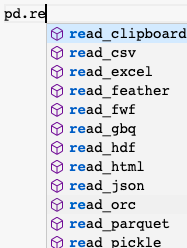



**CSV**

Nos exemplos abaixos, utilizaremos arquivos dados de teste, que estão disponíveis no meu github, mas o usuário poderia ler seus dados diretamente na sua estrutura de arquivo. Por exemplo, se meus dados estão em um arquivo chamados dados.csv, separados com o caracter ";" dentro do diretórios dados_empresas, o comando para ler esses dados será:

meusdados = pd.read_csv("./dados_empresas/dados.csv", sep=";").


In [7]:
meuCSV = "https://raw.githubusercontent.com/italomarcelogit/scripts-diversos/master/exemplo/exemplo.csv"
df = pd.read_csv(meuCSV)
df

,Coluna 1,Coluna 2
0,1,A
1,2,B
2,3,C
3,4,D
4,5,E


**EXCEL**

In [8]:
meuExcel = "https://github.com/italomarcelogit/scripts-diversos/blob/master/exemplo/exemplo.xlsx?raw=true"
df = pd.read_excel(meuExcel)
df

,Coluna 1,Coluna 2
0,1,A
1,2,B
2,3,C
3,4,D
4,5,E


## Funções rápidas para adicionar, alterar ou excluir dados

**Inserir uma nova linha no dataframe**

In [9]:
novalinha = {'Coluna 1': 6, 'Coluna 2': "f"}
df.loc[len(df)] = novalinha
df

,Coluna 1,Coluna 2
0,1,A
1,2,B
2,3,C
3,4,D
4,5,E
5,6,f


**Alterar uma linha**

Vamos alterar o valor da linha 5 e Coluna 2, de f para F

In [10]:
df.loc[5, 'Coluna 2'] = 'F'
df

,Coluna 1,Coluna 2
0,1,A
1,2,B
2,3,C
3,4,D
4,5,E
5,6,F


**Excluir linha ou coluna**

Podemos também excluir uma linha ou coluna. 
Para excluir a linha com índice 4 [5, E]

In [11]:
df = df.drop(df.index[4])
df

,Coluna 1,Coluna 2
0,1,A
1,2,B
2,3,C
3,4,D
5,6,F


E agora, vamos excluir a coluna 2

In [12]:
df = df.drop(columns="Coluna 2")
df

,Coluna 1
0,1
1,2
2,3
3,4
5,6


**Excluir definitivamente o dataframe**

E se o interesse é excluir definitivamente o dataframe do ambiente, utilize é como excluir uma variável no ambiente python, com a função del(variável).

In [13]:
del(df)

# **Explorar a estrutura do DataFrame com Pandas**

O nosso dataframe acima é um exemplo simples, possui poucas linhas e colunas mas imagine você analisando um log de autenticação de sua base de clientes que contém bilhões de linhas e até centenas de colunas?

Então vamos olhar para o nosso simples dataframe e vamos descobrir o que podemos fazer com as funções úteis que o Pandas nos oferece para conhecermos melhor como está estruturado o nosso dado (dataframe).

In [14]:
# leitura de dados da fonte CSV
arquivo = 'https://raw.githubusercontent.com/italomarcelogit/python-dicas-pandas/main/datasets/mini-dataset.csv'
df = pd.read_csv(arquivo) 
df

,nome,sexo,setor,idade,funcao,salario
0,ANTONIO,M,administrativo,26,Diretor,15000
1,GUSTAVO,M,administrativo,29,assistente,3000
2,NORMA,F,administrativo,49,assistente,3000
3,QUITERIA,F,artes,39,assistente,6000
4,RENATA,F,artes,39,assistente,5000
5,SANDRO,M,artes,48,NaN,4000
6,VANESSA,F,artes,29,assistente,4000
7,MARCOS,M,comercial,49,executivo de contas,3000
8,CARLA,F,comercial,22,Gerente,7000
9,DANIELA,F,comercial,50,executivo de contas,3000


## .shape
Exibe a quantidade de linhas e colunas do dataframe

In [15]:
df.shape # nosso df tem 25 linhas e 6 colunas

(25, 6)

## .columns
Exibe, em formato de index, os nomes de cada coluna do dataframe

In [16]:
df.columns

Index(['nome', 'sexo', 'setor', 'idade', 'funcao', 'salario'], dtype='object')

In [17]:
# dica: se deseja os nomes das colunas em uma lista, add a função .to_list()
df.columns.to_list()

['nome', 'sexo', 'setor', 'idade', 'funcao', 'salario']

Se houver a necessidade de renomear nome de uma coluna, você poderá utiliza o método rename para isso

In [18]:
# O comando abaixo demonstrará a alteração da coluna nome para Nome Completo
df.rename(columns={'nome': 'Nome Completo'}).columns

Index(['Nome Completo', 'sexo', 'setor', 'idade', 'funcao', 'salario'], dtype='object')

Mas o nome da coluna, na realidade não mudou, porque eu não alterei o valor do columns do dataframe. 

In [19]:
df.columns

Index(['nome', 'sexo', 'setor', 'idade', 'funcao', 'salario'], dtype='object')

Para fazer isso definitivamente, é só adicionar o atributo inplace=True na função **rename** do Pandas.

Ex.:

df.rename(columns={'nome': 'Nome Completo'}***, inplace=True***)

## .info()
Exibe informações do dataFrame como índice, colunas e seus tipos, valores não nulos, uso de memória e dtypes.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nome     25 non-null     object
 1   sexo     25 non-null     object
 2   setor    25 non-null     object
 3   idade    25 non-null     int64 
 4   funcao   22 non-null     object
 5   salario  25 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.3+ KB


# **Explorar o dataframe através dos índices e colunas**

Como disse anteriormente, na maioria das vezes, os dataframes possuem um grande volume de dados e manipular um volume grande não é interessante no momento que estamos analisando os dados contidos nele, seus tipos, seus erros, etc.

Então para conhecermos um pouco sobre os dados, utilizaremos algunas funções de manipulaçao do Pandas bastante populares.

## .head()

Para visualizar as primeiras linhas (rows) do dataframe, utilizamos a função **.head()** que, como padrão, retornará as primeiras 5 linhas. Mas podemos mudar isso passando o número de linhas como parâmetro.

In [21]:
df.head(3)

,nome,sexo,setor,idade,funcao,salario
0,ANTONIO,M,administrativo,26,Diretor,15000
1,GUSTAVO,M,administrativo,29,assistente,3000
2,NORMA,F,administrativo,49,assistente,3000


## .tail()

 Visualizar as últimas 5 linhas do dataframe, mas como o .head() também podemos alterar esse número de linhas passando o parâmetro desejado.

In [22]:
df.tail() # neste caso, utilizamos o padrão

,nome,sexo,setor,idade,funcao,salario
20,HELOISA,F,tecnologia,43,Gerente,10000
21,ISABELLE,F,tecnologia,28,Coordenador,7500
22,JOANA,F,tecnologia,29,Engenheiro de Software,5000
23,KLAYTON,M,tecnologia,33,NaN,5000
24,LAURO,M,tecnologia,26,Engenheiro de Software,5000


## .sample()

Em alguns momentos queremos trazer linhas com posições aleatórias e para isso utilizaremos a função .sample(). Diferente das anteriores, o número padrão de linhas retornada é 1 mas também é possível alterar esse número.

In [23]:
df.sample(2)

,nome,sexo,setor,idade,funcao,salario
11,PETRO,M,contabilidade,18,assistente,3000
9,DANIELA,F,comercial,50,executivo de contas,3000


Acredito que ficou claro nos blocos acima retornados que cada linha possui a sua identificação, conhecida como índice (index). E podemos utilizá-lo para diversas situações. Darei alguns exemplos:

## **Índices**

Índices são valores que referênciam as linhas. Por exemplo, na figura abaixo as linhas possuem os índices com o valor 16 e 0

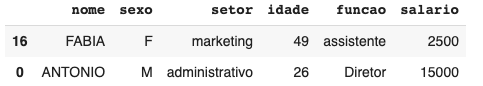

Em se tratando do dataframe df, nosso índice tem um range de 0 a 25 exclusivamente.

### .index
Exibir o range do índice do dataframe.
No caso do nosso dataframe df, o índice é um range de 0 a 25, incrementando de 1 em 1.

In [24]:
df.index

RangeIndex(start=0, stop=25, step=1)

In [25]:
# dica: caso deseja os valores em uma lista, pode-se usar o método .values
df.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

### .iloc[]
Permite localizar dados, através do índice, utilizando a localização pela posição.

In [26]:
# localizar e exibir linha da posição 3
df.iloc[3]

nome         QUITERIA
sexo                F
setor           artes
idade              39
funcao     assistente
salario          6000
Name: 3, dtype: object

In [27]:
# localizar e exibir o bloco de linhas que vão do início até a posição 2
df.iloc[:3] # veja, o 3 é onde ele para mas não o exibe.

,nome,sexo,setor,idade,funcao,salario
0,ANTONIO,M,administrativo,26,Diretor,15000
1,GUSTAVO,M,administrativo,29,assistente,3000
2,NORMA,F,administrativo,49,assistente,3000


In [28]:
# localizar e exibir o bloco de linhas a partir da linha 22
df.iloc[22:]

,nome,sexo,setor,idade,funcao,salario
22,JOANA,F,tecnologia,29,Engenheiro de Software,5000
23,KLAYTON,M,tecnologia,33,NaN,5000
24,LAURO,M,tecnologia,26,Engenheiro de Software,5000


In [29]:
# ou somente localizar e exibir o bloco de linhas das posições 5 até 9
df.iloc[5:10]

,nome,sexo,setor,idade,funcao,salario
5,SANDRO,M,artes,48,NaN,4000
6,VANESSA,F,artes,29,assistente,4000
7,MARCOS,M,comercial,49,executivo de contas,3000
8,CARLA,F,comercial,22,Gerente,7000
9,DANIELA,F,comercial,50,executivo de contas,3000


## **Colunas**

Assim como exibimos os valores pelas linhas, podemos também fazer a exibição pelas colunas. Vamos a alguns exemplos

In [30]:
# Exibir dados somente da coluna nome
df["nome"]  

0      ANTONIO
1      GUSTAVO
2        NORMA
3     QUITERIA
4       RENATA
5       SANDRO
6      VANESSA
7       MARCOS
8        CARLA
9      DANIELA
10     EDUARDO
11       PETRO
12      OTAVIO
13     BEATRIZ
14     TEODORO
15      ZURIEL
16       FABIA
17      UBALDO
18      XAVIER
19     YOLANDA
20     HELOISA
21    ISABELLE
22       JOANA
23     KLAYTON
24       LAURO
Name: nome, dtype: object

In [31]:
# para mais colunas, utilizamos a estrutura de vetor (array)
colunas = ["nome", "sexo"]
df[colunas] # ou df[["nome", "sexo"]]

,nome,sexo
0,ANTONIO,M
1,GUSTAVO,M
2,NORMA,F
3,QUITERIA,F
4,RENATA,F
5,SANDRO,M
6,VANESSA,F
7,MARCOS,M
8,CARLA,F
9,DANIELA,F


Como também já comentei, imagine um dataframe com milhões de linhas isso exigiria uma performance melhor da sua máquina ou aplicação mas como nosso dataframe é super pequeno (shape 25, 6) isso não está afetando nosso exemplo.

Outra dica legal é você também utilizar o que já aprendemos anteriormente.

In [32]:
# bloco com nome e sexo mas somente entre os registros de 5 a 9
df.iloc[5:9][["nome", "sexo"]]

,nome,sexo
5,SANDRO,M
6,VANESSA,F
7,MARCOS,M
8,CARLA,F


## Bloco de linhas e colunas

### .loc[]

Para exibir um grupo ou bloco de linhas e colunas, utilizando seus rótulos (índices e colunas). Vamos aos exemplos

In [33]:
# exibir o nome da linha 3
df.loc[3, 'nome']

'QUITERIA'

In [34]:
# exibir nome e salário do início até a linha 3
df.loc[:3, ['nome','salario']]

,nome,salario
0,ANTONIO,15000
1,GUSTAVO,3000
2,NORMA,3000
3,QUITERIA,6000


In [35]:
# as mesmas colunas acima, mas pulando de 7 em 7 linhas
df.loc[::7, ['nome', 'salario']]

,nome,salario
0,ANTONIO,15000
7,MARCOS,3000
14,TEODORO,2500
21,ISABELLE,7500


In [36]:
# as mesmas colunas acima, pulando de 7 em 7 linhas mas de tras pra frente
df.loc[::-7, ['nome', 'salario']]

,nome,salario
24,LAURO,5000
17,UBALDO,2500
10,EDUARDO,3000
3,QUITERIA,6000


## .copy()

**Italo, posso fazer cópias de dataframe?**

Sim, isso é muito comum pois algumas vezes preparamos nosso dataframe, queremos fazer algumas outras análises ou testes mas não queremos perder o trabalho anterior. Então o analista, antes disso, fazs uma cópia. 

Mas lembre-se, uma CÓPIA, entendeu? Não? Sem problemas, eu também já perdi tempo por não me atentar a isso, então segue exemplos.

In [37]:
# vamos criar um dataframe, a partir do dataframe df com as primeiras
# 5 linhas e somente com os dados das colunas nome e salario
colunas = ["nome", "salario"]
df1 = df.iloc[:5][colunas]
df1

,nome,salario
0,ANTONIO,15000
1,GUSTAVO,3000
2,NORMA,3000
3,QUITERIA,6000
4,RENATA,5000


Nosso dataset acima é pequenino, mas imagine um dataset com uns 5k de linhas e diversas colunas, com horas de trabalho em cima dele, com diversos tratamentos e limpezas de dados. O analista pretende executar uma ação que pode melhorar e muito o dataframe dele, MAAAS ele pensa: "cara, vou fazer uma cópia, trabalho em cima dela e se der certo, blz, senão, excluo e continuo a partir do meu backup. 

É aí que pode acontecer um erro bem comum.

In [38]:
# vamos fazer uma cópia do df1, que é o dataframe original, criando o dataframe df2
df2 = df1
df2

,nome,salario
0,ANTONIO,15000
1,GUSTAVO,3000
2,NORMA,3000
3,QUITERIA,6000
4,RENATA,5000


O df2 acima está igual ao df1. Show, cópia efetuada com sucesso.
Então vamos modificá-lo, atribuindo o valor de 1000 em todos os registros do dataframe.

In [39]:
df2["salario"] = 1000
df2

,nome,salario
0,ANTONIO,1000
1,GUSTAVO,1000
2,NORMA,1000
3,QUITERIA,1000
4,RENATA,1000


Coluna salario do df2 com todos os valores igual a 1000, perfect!!!

Mas booom, olha o que aconteceu no df1

In [40]:
df1

,nome,salario
0,ANTONIO,1000
1,GUSTAVO,1000
2,NORMA,1000
3,QUITERIA,1000
4,RENATA,1000


Viram o problema?
Nós alteramos o salário do df2 e acabou alterando também o salário do df1 e isso acontece pq quando utilizamos o = somente as referências aos dados e ao índice são copiadas para o df2, do df1. 
Para não ter mais esse problema, o pandas oferece o **.copy()**, que fará realmente uma cópia dos dados e dos índices do dataframe de oriem.

In [41]:
# resumidamente, vamos a solução
# parte 1
colunas = ["nome", "salario"]
df1 = df.iloc[:5][colunas].copy()
# parte 2 - .copy é a solução
df2 = df1.copy()
# parte 3, alterando os valores do salario
df2['salario'] = 1000
df2

,nome,salario
0,ANTONIO,1000
1,GUSTAVO,1000
2,NORMA,1000
3,QUITERIA,1000
4,RENATA,1000


In [42]:
# e o original df1
df1

,nome,salario
0,ANTONIO,15000
1,GUSTAVO,3000
2,NORMA,3000
3,QUITERIA,6000
4,RENATA,5000


# **Alterar o layout do dataframe**

Existem situações onde precisamos alterar o layout do nosso dataframe para um formato onde uma ou mais colunas se tornam identificadora enquanto as outras colunas se tornam as medidas (valores).

##**.melt()**

Quando queremos transformar as linhas do dataframe em coluna, utilizamos a função .melt() mas creio que com o exemplo facilitará mais o entendimento.

In [43]:
# pra facilitar a visualização, criamos o dataframe df1 com uma cópia do df 
# contendo somente as 2 primeiras linhas e todas as suas colunas
df1 = df.iloc[:2].copy() #
df1

,nome,sexo,setor,idade,funcao,salario
0,ANTONIO,M,administrativo,26,Diretor,15000
1,GUSTAVO,M,administrativo,29,assistente,3000


In [44]:
df1.shape

(2, 6)

In [45]:
# agora imagine se o nosso desejo fosse o seguinte:
# a partir do df1, gere um novo dataframe com 2 colunas, onde 
# a primeira coluna será a identificação do dado (variable)
# e a segunda coluna será a media (value)
df2 = df1.melt()
df2

,variable,value
0,nome,ANTONIO
1,nome,GUSTAVO
2,sexo,M
3,sexo,M
4,setor,administrativo
5,setor,administrativo
6,idade,26
7,idade,29
8,funcao,Diretor
9,funcao,assistente


In [46]:
# uma dica: caso você deseja alterar o nome das colunas
# segue o exemplo abaixo mas lembre-se: esse vetor tem que ter a quantidade de colunas
# no nosso caso, como temos somente 2 colunas, nosso array tem somente 2 posições e seus valores
df2.columns = ["campo", "valor"]
df2

,campo,valor
0,nome,ANTONIO
1,nome,GUSTAVO
2,sexo,M
3,sexo,M
4,setor,administrativo
5,setor,administrativo
6,idade,26
7,idade,29
8,funcao,Diretor
9,funcao,assistente


## **.pivot()**

A função pivot () é usada para remodelar o dataframe organizado por determinados valores de índice / coluna. 
Esta função não suporta agregação de dados, vários valores resultarão em um MultiIndex nas colunas.
Vamos ao exemplo

In [47]:
df2 = pd.DataFrame({
    "mes": [1, 1, 2, 2],
    "nome": ["Joao", "Maria", "Joao", "Maria"],
    "vendas": [20000, 20000, 40000, 40000]
})
df2

,mes,nome,vendas
0,1,Joao,20000
1,1,Maria,20000
2,2,Joao,40000
3,2,Maria,40000


In [48]:
df2.pivot(index='mes', columns='nome', values='vendas')

nome,Joao,Maria
mes,,
1,20000,20000
2,40000,40000


## **.pivot_table()**

Temos também a função pivot_table() que é usada para criar uma tabela dinâmica no estilo planilha como um dataFrame. Os níveis da tabela dinâmica serão armazenados em objetos MultiIndex (índices hierárquicos) no índice e nas colunas do DataFrame de resultado.

In [49]:
dfTeste = pd.DataFrame({
    "uf": ["SP", "SP", "SP", "SP", "MG", "MG", "MG", "MG", "MG"],
    "cidade": ["A", "B", "B", "A", "C", "D", "D", "D", "d"],
    "produto": ["P1", "P2", "P1", "P2", "P2", "P2", "P1", "P1", "P1"],
    "quantidade": [1, 1, 1, 1, 1, 1, 1, 1, 1]}
)
dfTeste

,uf,cidade,produto,quantidade
0,SP,A,P1,1
1,SP,B,P2,1
2,SP,B,P1,1
3,SP,A,P2,1
4,MG,C,P2,1
5,MG,D,P2,1
6,MG,D,P1,1
7,MG,D,P1,1
8,MG,d,P1,1


In [50]:
dfTeste.pivot_table(values="quantidade", index=["uf", "cidade"], columns="produto",
                    aggfunc="sum", fill_value=0)

produto    P1  P2
uf cidade        
MG C        0   1
   D        2   1
   d        1   0
SP A        1   1
   B        1   1

## **.drop()**
Excluir linhas e/ou colunas de um dataframe



In [51]:
# vamos copiar as 5 primeiras linhas do df
dfteste = df.iloc[:5].copy()
dfteste

,nome,sexo,setor,idade,funcao,salario
0,ANTONIO,M,administrativo,26,Diretor,15000
1,GUSTAVO,M,administrativo,29,assistente,3000
2,NORMA,F,administrativo,49,assistente,3000
3,QUITERIA,F,artes,39,assistente,6000
4,RENATA,F,artes,39,assistente,5000


In [52]:
# vamos remover a coluna setor
dfteste.drop(labels=['setor'], axis=1, inplace=True) 
# axis=1, por que é exclusão por coluna
# inplace = True porque realmente desejo excluir, por padrão é false, então não excluiria.

In [53]:
dfteste.drop(labels=[0,2,4], axis=0)

,nome,sexo,idade,funcao,salario
1,GUSTAVO,M,29,assistente,3000
3,QUITERIA,F,39,assistente,6000


In [54]:
# acima, utilizamos axis=0 porque fiz a seleção por linha
# mas os dados não foram removidos pq não alterei o inplace, conforme abaixo
dfteste

,nome,sexo,idade,funcao,salario
0,ANTONIO,M,26,Diretor,15000
1,GUSTAVO,M,29,assistente,3000
2,NORMA,F,49,assistente,3000
3,QUITERIA,F,39,assistente,6000
4,RENATA,F,39,assistente,5000


In [55]:
dfteste.drop(labels=[0,2,4], axis=0, inplace=True)
dfteste
# excluindo as linhas definitivamente

,nome,sexo,idade,funcao,salario
1,GUSTAVO,M,29,assistente,3000
3,QUITERIA,F,39,assistente,6000


In [56]:
# excluindo o dataframe dfteste do ambiente
del dfteste

# **Concatenar dataframes**

## **concat([df1, df2]**

É comum concatenar dois dataframes. A função que iremos utilizar é a **.concat()**., permitindo essa concatenação baseada também por eixos (0 ou 1) mas ela não é uma função do dataframe e sim do Pandas. 

Vamos a alguns exemplos.

In [57]:
# Vamos concatenar 2 dataframes, como exemplo, 
# o df1 terá os registros com índice de 0 a 4 
# e o df2 de 10 a 13
df1 = df[:5][["nome", "salario"]].copy()
df2 = df[10:13][["nome", "salario"]].copy()
df1

,nome,salario
0,ANTONIO,15000
1,GUSTAVO,3000
2,NORMA,3000
3,QUITERIA,6000
4,RENATA,5000


In [58]:
df2

,nome,salario
10,EDUARDO,3000
11,PETRO,3000
12,OTAVIO,3000


In [59]:
pd.concat([df1, df2]) 
# lembrando que aqui o resultado poderia ser atribuido a uma variável

,nome,salario
0,ANTONIO,15000
1,GUSTAVO,3000
2,NORMA,3000
3,QUITERIA,6000
4,RENATA,5000
10,EDUARDO,3000
11,PETRO,3000
12,OTAVIO,3000


Veja que acima, os valores dos índices foram mantidos. Podemos ignorar os valores dos indices, conforme abaixo.

In [60]:
pd.concat([df1, df2], ignore_index=True) 

,nome,salario
0,ANTONIO,15000
1,GUSTAVO,3000
2,NORMA,3000
3,QUITERIA,6000
4,RENATA,5000
5,EDUARDO,3000
6,PETRO,3000
7,OTAVIO,3000


Outro exemplo de concatenação de 2 dataframes, sendo que o primeiro tem o shape 5x2 e o segundo tem o shape 3x1.

In [61]:
# e mais um exemplo do concat, 2 dataframes sendo que o primeiro eu tenho somente as 
# colunas nome e salario e no segundo, eu tenho somente a coluna setor
# assim concatenamos os dois dataframes, mas o segundo será adicionado como coluna
df1 = df[:5][["nome", "salario"]].copy()
df2 = df[6:9][["setor"]].copy()
print(df1.shape)
print(df2.shape)

(5, 2)
(3, 1)


In [62]:
pd.concat([df1, df2], axis=1, ignore_index=True)

,0,1,2
0,ANTONIO,15000.0,NaN
1,GUSTAVO,3000.0,NaN
2,NORMA,3000.0,NaN
3,QUITERIA,6000.0,NaN
4,RENATA,5000.0,NaN
6,NaN,NaN,artes
7,NaN,NaN,comercial
8,NaN,NaN,comercial


Por eles terem índices  e colunas diferentes, o pandas preencheu com o valor nulo as células que não são compatíveis entre os frames. Se mantermos os mesmos índices mas colunas diferentes, veja que ele se comporta diferente, conforme abaixo:

In [63]:
df1 = df[:5][["nome", "salario"]].copy()
df2 = df[:5][["setor"]].copy()
pd.concat([df1, df2], axis=1, ignore_index=True)

,0,1,2
0,ANTONIO,15000,administrativo
1,GUSTAVO,3000,administrativo
2,NORMA,3000,administrativo
3,QUITERIA,6000,artes
4,RENATA,5000,artes


## **.merge(df1, df2)**

Esta função combina dataframes também mas baseada em dados comuns. Vamos ao exemplo:

vamos criar um dataframe com somente 6 registros e com as colunas nome, setor, funcao e idade. Estou selecionando somente dados que a coluna função tem o valor igual a **assistente**.

In [64]:
assistentes = df[df["funcao"] == 'assistente'][['nome', 'setor','funcao', 'idade']].copy()[:6]
assistentes

,nome,setor,funcao,idade
1,GUSTAVO,administrativo,assistente,29
2,NORMA,administrativo,assistente,49
3,QUITERIA,artes,assistente,39
4,RENATA,artes,assistente,39
6,VANESSA,artes,assistente,29
11,PETRO,contabilidade,assistente,18


In [65]:
# vamos imaginar que temos esse outro dataframe
dfTeste = pd.DataFrame({
    "nome": ["RENATA", "VANESSA", "FABIA", "JOAO DA SILVA"],
    "setor": ["artes", "artes", "marketing", "engenharia"]
})
dfTeste

,nome,setor
0,RENATA,artes
1,VANESSA,artes
2,FABIA,marketing
3,JOAO DA SILVA,engenharia


In [66]:
# agora vamos fazer o merge entre os 2 dataframes artes e dfTeste
merge1 = pd.merge(assistentes, dfTeste)
merge1

,nome,setor,funcao,idade
0,RENATA,artes,assistente,39
1,VANESSA,artes,assistente,29


O pandas combinou os 2 dataframes, mas como não definimos com qual coluna ele irá fazer o merge, por default, ele usou a coluna da esquerda, no caso NOME

In [67]:
# vamos então fazer o merge pela direita
merge2 = pd.merge(assistentes, dfTeste, how='right')
merge2

,nome,setor,funcao,idade
0,RENATA,artes,assistente,39.0
1,VANESSA,artes,assistente,29.0
2,FABIA,marketing,NaN,NaN
3,JOAO DA SILVA,engenharia,NaN,NaN


Neste caso, vemos que o JOAO DA SILVA apareceu porque fizemos pela coluna da direita (setor) mas como JOAO DA SILVA não existe no dataframe assistentes, a idade dele é nula

# **Consultar e filtrar dados do dataframe**

Vamos agora utilizar algumas funções do Pandas que facilitam bastante na hora de filtrar. Usaremos o padrão pandas de consulta e também o formato query bem conhecido pelos usuários de banco de dados.

## Filtrando dados

### Indexação booleana
Funciona apenas com valores em uma coluna e, tendo mais condições e colunas, utiliza-se os operadores & ou ||

In [68]:
# listar somente pessoas que tenham a idade menor que 20
df[df['idade'] < 20]

,nome,sexo,setor,idade,funcao,salario
11,PETRO,M,contabilidade,18,assistente,3000


In [69]:
# listar pessoas da tecnologia que tem o salário maior que 5000
df[(df['setor'] == 'tecnologia') & (df['salario'] > 5000)]

,nome,sexo,setor,idade,funcao,salario
20,HELOISA,F,tecnologia,43,Gerente,10000
21,ISABELLE,F,tecnologia,28,Coordenador,7500


In [70]:
# listar somente o nome e o salário das pessoas da tecnologia que tem o salário maior que 5000
resultado = ['nome', 'salario']
df[(df['setor'] == 'tecnologia') & (df['salario'] > 5000)][resultado]

,nome,salario
20,HELOISA,10000
21,ISABELLE,7500


In [71]:
# listar pessoas que tem idade menor que 20 ou salário maior que 10000
df[(df['idade'] < 20) | (df['salario'] > 10000)]

,nome,sexo,setor,idade,funcao,salario
0,ANTONIO,M,administrativo,26,Diretor,15000
11,PETRO,M,contabilidade,18,assistente,3000


### Consulta

Funciona somente utilizando colunas e a função do dataframe utilizada é a .query()

In [72]:
# ou no formato query
df.query("idade < 20")

,nome,sexo,setor,idade,funcao,salario
11,PETRO,M,contabilidade,18,assistente,3000


In [73]:
df.query("setor == 'tecnologia' and salario > 5000")

,nome,sexo,setor,idade,funcao,salario
20,HELOISA,F,tecnologia,43,Gerente,10000
21,ISABELLE,F,tecnologia,28,Coordenador,7500


In [74]:
resultado = ['nome', 'salario']
df.query("setor == 'tecnologia' and salario > 5000")[resultado]

,nome,salario
20,HELOISA,10000
21,ISABELLE,7500


### Usando LOC

.loc é utilizado para acessar uma ou mais linhas e colunas por rótulos ou índices

In [75]:
df.loc[(df['idade'] > 40) & (df['setor'] == 'comercial')]

,nome,sexo,setor,idade,funcao,salario
7,MARCOS,M,comercial,49,executivo de contas,3000
9,DANIELA,F,comercial,50,executivo de contas,3000


## Listando valores únicos
Para listar valores exclusivo de uma coluna, utilizamos a função .unique()

In [76]:
df['funcao']

0                    Diretor
1                 assistente
2                 assistente
3                 assistente
4                 assistente
5                        NaN
6                 assistente
7        executivo de contas
8                   Gerente 
9        executivo de contas
10       executivo de contas
11                assistente
12                assistente
13                assistente
14                assistente
15                       NaN
16                assistente
17                assistente
18               Coordenador
19                assistente
20                  Gerente 
21               Coordenador
22    Engenheiro de Software
23                       NaN
24    Engenheiro de Software
Name: funcao, dtype: object

In [77]:
# Vamos exibir todas as cargos (coluna funcao) sem repetí-los

cargosUnicos = df['funcao'].unique()
cargosUnicos

array(['Diretor', 'assistente', nan, 'executivo de contas', 'Gerente ',
       'Coordenador', 'Engenheiro de Software'], dtype=object)

In [78]:
# caso o interesse seja o retorno em forma de lista, usamos o .tolist()
cargosUnicos.tolist()

['Diretor',
 'assistente',
 nan,
 'executivo de contas',
 'Gerente ',
 'Coordenador',
 'Engenheiro de Software']

## Operadores e estatísticas

Não vamos explicar aqui detalhamente os operadores básicos como:

*   soma, subtração, multiplicação e divisão
*   +=, =, ==, >, <=, etc
*   in, not in
*   and, or, &, |, etc

O Pandas oferece funções que realmente facilitam o nosso trabalho. Imagine situações onde precisamos somar todos os valores de uma coluna, ou simplesmente contar a quantidade, calcular a mediana, frequência.
É isso que veremos agora...

### .sum()

In [79]:
# Somar todos os valores da coluna saláriodo dataframe df
df['salario'].sum()

113500

### .count()

In [80]:
# contar a quantidade de salários no dataframe
df['salario'].count()

25

In [81]:
# ou poderíamos até utilizarmos recursos pra melhorar nossa resposta
f"O total de salários pago aos {df['salario'].count()} funcionários é de ${df['salario'].sum()}"

'O total de salários pago aos 25 funcionários é de $113500'

### value_counts()

In [82]:
# Contar quantos registros tem cada setor do dataframe
df['setor'].value_counts()

tecnologia        5
artes             4
comercial         4
marketing         4
administrativo    3
financeiro        3
contabilidade     2
Name: setor, dtype: int64

### max() e min()

In [83]:
# Maior salário
df['salario'].max()

15000

In [84]:
# idade do funcionário mais novo
df['idade'].min()

18

### mean() e median()
A média é a média aritmética de um conjunto de números. A mediana é um valor numérico que separa a metade superior de um conjunto da metade inferior.

In [85]:
# Visualizando os dados do setor de tecnologia:
df.query(f"setor == 'tecnologia'")

,nome,sexo,setor,idade,funcao,salario
20,HELOISA,F,tecnologia,43,Gerente,10000
21,ISABELLE,F,tecnologia,28,Coordenador,7500
22,JOANA,F,tecnologia,29,Engenheiro de Software,5000
23,KLAYTON,M,tecnologia,33,NaN,5000
24,LAURO,M,tecnologia,26,Engenheiro de Software,5000


In [86]:
# Média salarial da equipe de tecnologia
df[df['setor']=="tecnologia"]["salario"].mean()

6500.0

In [87]:
# Mediana salarial da equipe de tecnologia
df[df['setor']=="tecnologia"]["salario"].median()

5000.0

### describe()

Esta função exibe, de forma simples, estatísticas descritivas das variáveis: a quantidade de valores, a média, o desvio padrão, o valor mínimo, os quartis da distribuição e o valor máximo. Quando o valor é categórico (não numérico), nem todas as informações acimas poderão ser exibidas por simplesmente não possuir valores numéricos.

In [88]:
df.describe()
# veja abaixo que ele retornou somente de 2 colunas pois somente elas são numéricas

,idade,salario
count,25.000000,25.000000
mean,35.200000,4540.000000
std,10.202124,2875.615876
min,18.000000,2500.000000
25%,28.000000,3000.000000
50%,33.000000,3000.000000
75%,47.000000,5000.000000
max,50.000000,15000.000000


In [89]:
# Agora a função describe irá trazer dados estatísticos somente das colunas não numéricas
df.describe(exclude='number')

,nome,sexo,setor,funcao
count,25,25,25,22
unique,25,2,7,6
top,ANTONIO,M,tecnologia,assistente
freq,1,13,5,12


In [90]:
# ou somente de uma coluna
df['funcao'].describe()
# existem 22 itens, sendo 6 únicos, o valor mais frequente é "assistente" (12x)


count             22
unique             6
top       assistente
freq              12
Name: funcao, dtype: object

Acredito que vocês notaram que a coluna **função** retornou somente 22 linhas ao contrário das outras e o motivo é que ela contém valores nulos NaN e a função describe não retorna dados estatísticos quando há esse tipo de valor.


In [91]:
# Vamos ver a função describe de uma coluna "salario" utilizando o filtro setor = "tecnologia"
df[df['setor']=="tecnologia"]['salario'].describe()

count        5.000000
mean      6500.000000
std       2236.067977
min       5000.000000
25%       5000.000000
50%       5000.000000
75%       7500.000000
max      10000.000000
Name: salario, dtype: float64

Como fizemos nos exemplos de média (mean) e mediana )median anteriormente, na função describe, a média também é exibida e a mediana é o valor dos 50%

## groupby() 
Em certas análises, é necessário agrupar colunas e aplicar cálculos como soma, por exemplo, para validarmos certas combinações. Por exemplo, eu quero saber qual o total gasto com salários por departamento.

In [92]:
# A variavel grupo representa a coluna que será agrupada
# A variavel resultado define quais colunas sofrerão o agrupamento
# a função .sum(), somará o total dos salários por agrupamento
grupo = 'setor'
resultado = ['setor', 'salario']
salario_setor = df[resultado].groupby(grupo).sum()
salario_setor

,salario
setor,
administrativo,21000
artes,19000
comercial,16000
contabilidade,6000
financeiro,8000
marketing,11000
tecnologia,32500


Podemos inclusive agrupar com mais colunas. 
No exemplo abaixo, Vamos retornar o mesmo resultado, porém agora vamos agrupar por setor e funcao, e salvar o resultado em uma variável chamada salarios_setor_funcao

In [93]:
grupo = ['setor', 'funcao']
resultado = ['setor', 'funcao', 'salario']
salarios_setor_funcao = df[resultado].groupby(grupo).sum()
salarios_setor_funcao

salario
setor          funcao                         
administrativo Diretor                   15000
               assistente                 6000
artes          assistente                15000
comercial      Gerente                    7000
               executivo de contas        9000
contabilidade  assistente                 6000
financeiro     assistente                 5000
marketing      Coordenador                3500
               assistente                 7500
tecnologia     Coordenador                7500
               Engenheiro de Software    10000
               Gerente                   10000

## Ordenando os resultados

### sort_values() 
Ordenar resultados por qualquer um dos eixos (0=índice e 1=coluna)

Utilizando a variável salarios_setor_funcao acima, vamos ordenar pela coluna **salario** mas do maior para o menor salário.

In [94]:
# o atributo ascending, se true que é o default, ordena do menor para o maior
salarios_setor_funcao.sort_values(by='salario', ascending=False)

salario
setor          funcao                         
administrativo Diretor                   15000
artes          assistente                15000
tecnologia     Engenheiro de Software    10000
               Gerente                   10000
comercial      executivo de contas        9000
marketing      assistente                 7500
tecnologia     Coordenador                7500
comercial      Gerente                    7000
administrativo assistente                 6000
contabilidade  assistente                 6000
financeiro     assistente                 5000
marketing      Coordenador                3500

Utilizando a mesma variável salarios_setor_funcao, vamos ordenar pelo setor e salário, do menor para o maior salário

In [95]:
salarios_setor_funcao.sort_values(by=['setor', 'salario'])

salario
setor          funcao                         
administrativo assistente                 6000
               Diretor                   15000
artes          assistente                15000
comercial      Gerente                    7000
               executivo de contas        9000
contabilidade  assistente                 6000
financeiro     assistente                 5000
marketing      Coordenador                3500
               assistente                 7500
tecnologia     Coordenador                7500
               Engenheiro de Software    10000
               Gerente                   10000

### nlargest()
Retorna as primeiras n linhas ordenadas por colunas e em ordem decrescente.

In [96]:
# abaixo, segue a função .nlargest(qtde-de-linhas, coluna) p/ ordenar de forma 
# descendente. Usei a funçao len(objeto) para pegar o total de linhas do dataframe
salarios_setor_funcao.nlargest(3, columns='salario')

,,salario
setor,funcao,
administrativo,Diretor,15000
artes,assistente,15000
tecnologia,Engenheiro de Software,10000


### nsmallest()
Retorna as primeiras n linhas ordenadas por colunas em ordem crescente.

In [97]:
salarios_setor_funcao.nsmallest(3, columns='salario')

,,salario
setor,funcao,
marketing,Coordenador,3500
financeiro,assistente,5000
administrativo,assistente,6000


# **Editar valores**
Na maioria das vezes é tarefa do analista melhorar o dado de várias maneiras como remover valores nulos, editar e padronizar valores, efetuar algumas limpezas nos dados. Isso é chamado de **tratamento de dados**.Então, vamos a alguns exemplos

In [98]:
# vamos fazer uma cópia do dataframe df original
dfCopia = df.copy()

In [99]:
dfCopia.head()

,nome,sexo,setor,idade,funcao,salario
0,ANTONIO,M,administrativo,26,Diretor,15000
1,GUSTAVO,M,administrativo,29,assistente,3000
2,NORMA,F,administrativo,49,assistente,3000
3,QUITERIA,F,artes,39,assistente,6000
4,RENATA,F,artes,39,assistente,5000


In [100]:
# vamos alterar o nome da coluna funcao para cargo
dfCopia.rename(columns={"funcao": "cargo"}, inplace=True)
dfCopia.head()

,nome,sexo,setor,idade,cargo,salario
0,ANTONIO,M,administrativo,26,Diretor,15000
1,GUSTAVO,M,administrativo,29,assistente,3000
2,NORMA,F,administrativo,49,assistente,3000
3,QUITERIA,F,artes,39,assistente,6000
4,RENATA,F,artes,39,assistente,5000


### .fillna() e .dropna()

Aqui vai uma dica muito útil pois na maioria das vezes o dataframe que está sendo trabalhado vem com valores nulos (ausentes) e em algumas vezes precisamos remover os registros que contém dados nulos ou substituir esses valores nulos com valores pré-definidos pelo negócio ou ciência.
Vamos aos exemplos.

In [101]:
dfCopia.isnull()

,nome,sexo,setor,idade,cargo,salario
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


Mas imagine um dataframe com milhares de linhas? Assim complica. Então, vamos utilizar a função isnull() do dataframe e adicionar a função sum() para somar todos os valores nulos contidos coluna a coluna.

In [102]:
dfCopia.isnull().sum()

nome       0
sexo       0
setor      0
idade      0
cargo      3
salario    0
dtype: int64

In [103]:
# vamos visualizar esses registros que possuem a coluna cargo com valores NaN
dfCopia[dfCopia['cargo'].isnull()]

,nome,sexo,setor,idade,cargo,salario
5,SANDRO,M,artes,48,NaN,4000
15,ZURIEL,M,financeiro,20,NaN,3000
23,KLAYTON,M,tecnologia,33,NaN,5000


Se quisessemos excluir todos os registros com valores nulos era somente fazer atribuir a aplicação em destaque a variável dfCopia 

dfCopia = **dfCopia.dropna()**

Abaixo, somente uma forma de saber como ficaria o dataframe dfCopia se realmente aplicássemos o dropna no datraframe


In [104]:
dfCopia.dropna().isnull().sum()

nome       0
sexo       0
setor      0
idade      0
cargo      0
salario    0
dtype: int64

Mas vamos tratar os dados, substituindo os valores nulos por valores devidos.

In [105]:
dfCopia.isnull().sum()

nome       0
sexo       0
setor      0
idade      0
cargo      3
salario    0
dtype: int64

In [106]:
dfCopia[dfCopia['cargo'].isnull()]

,nome,sexo,setor,idade,cargo,salario
5,SANDRO,M,artes,48,NaN,4000
15,ZURIEL,M,financeiro,20,NaN,3000
23,KLAYTON,M,tecnologia,33,NaN,5000


Sandro é de artes, Zuriel é do financeiro e Klayton é da tecnologia e nenhum salário passou dos 5000. Vamos verificar como é o padrão desta coluna cargo para salários nessa faixa.

In [107]:
dfCopia[df['salario']<6000][['setor','salario','cargo']].value_counts()

setor           salario  cargo                 
comercial       3000     executivo de contas       3
marketing       2500     assistente                3
administrativo  3000     assistente                2
contabilidade   3000     assistente                2
financeiro      2500     assistente                2
tecnologia      5000     Engenheiro de Software    2
artes           4000     assistente                1
                5000     assistente                1
marketing       3500     Coordenador               1
dtype: int64

Vamos tratar os dados de acordo com os setores. Analisando os 3 registros com cargos nulos, vemos que os setores são artes, financeiro e tecnologia porém, analisando a lista de salários < 6000, vemos que no departamento tecnologia, o cargo é Engenheiro de Software e nos outros setores, o cargo é assistente. Detectei um padrão, então vou adotar a seguinte estratégia

1.   selecionar todas as linhas com o cargo null (nan) e o setor igual a tecnologia e atribuir o valor 'Engenheiro de Software'
2.   e depois vou preencher automaticamente todos os outros registros que tem a coluna cargo com valores nulos e atribuir o valor 'assistente'

In [108]:
# 1
filtro = (dfCopia['cargo'].isnull()) & (dfCopia['setor']=='tecnologia')
dfCopia.loc[filtro, 'cargo'] = "Engenheiro de Software"
# vamos listar e ver se o KLAYTON saiu da lista dos cargos com valores nulos
dfCopia[dfCopia['cargo'].isnull()]

,nome,sexo,setor,idade,cargo,salario
5,SANDRO,M,artes,48,NaN,4000
15,ZURIEL,M,financeiro,20,NaN,3000


In [109]:
# 2
dfCopia.fillna('assistente', inplace=True)
# vamos listar e ver se todos saíram da lista dos cargos com valores nulos
dfCopia[dfCopia['cargo'].isnull()]

,nome,sexo,setor,idade,cargo,salario


Mas veja, essa foi a estratégia adotada para este caso. Poderíamos ter usado a moda para determinar o valor ou qualquer outra estratégia que o negócio ou a análise identifica como melhor.

In [110]:
# agora não temos mais valores nulos na coluna cargo
dfCopia['cargo'].unique().tolist()

['Diretor',
 'assistente',
 'executivo de contas',
 'Gerente ',
 'Coordenador',
 'Engenheiro de Software']

In [111]:
dfCopia.isnull().sum()

nome       0
sexo       0
setor      0
idade      0
cargo      0
salario    0
dtype: int64

### .apply() e lambda

A função apply() é uma das funções mais usadas para manipular dados, criar e editar valores e muitas outras funcionalidades. Vou mostrá-la utilizando também a funçao lambda. Abaixo seguem exemplos 

Vamos deixar todos os cargos em letras maiúsculas. Junto com a .apply() a função lambda que consiste em atribuir valor ao objeto e nela usaremos função str().upper(), que converterá o valor do objeto em uma string e após isso, essa string em maiúscula.

In [112]:
dfCopia['cargo'] = dfCopia['cargo'].apply(lambda x: str(x).upper())

In [113]:
# agora todos os cargos estão em maiúsculo
dfCopia['cargo'].unique().tolist()

['DIRETOR',
 'ASSISTENTE',
 'EXECUTIVO DE CONTAS',
 'GERENTE ',
 'COORDENADOR',
 'ENGENHEIRO DE SOFTWARE']

In [114]:
dfCopia.head(10)

,nome,sexo,setor,idade,cargo,salario
0,ANTONIO,M,administrativo,26,DIRETOR,15000
1,GUSTAVO,M,administrativo,29,ASSISTENTE,3000
2,NORMA,F,administrativo,49,ASSISTENTE,3000
3,QUITERIA,F,artes,39,ASSISTENTE,6000
4,RENATA,F,artes,39,ASSISTENTE,5000
5,SANDRO,M,artes,48,ASSISTENTE,4000
6,VANESSA,F,artes,29,ASSISTENTE,4000
7,MARCOS,M,comercial,49,EXECUTIVO DE CONTAS,3000
8,CARLA,F,comercial,22,GERENTE,7000
9,DANIELA,F,comercial,50,EXECUTIVO DE CONTAS,3000


Pronto, todos os cargos agora estão com os valores em MAIÚSCULOS. Agora vamos fazer outro exemplo usando lambda mas com uma função criada pelo analista de dados. 

1.   vamos litar todos que tem salário menor que 3000 
2.   criar a função salario_reajuste que receberá o valor do objeto e o percentual de reajuste
3.   e com a função apply, aplicaremos a nossa função salario_reajuste desenvolvida.


In [115]:
# 1
dfCopia.query('salario < 3000')

,nome,sexo,setor,idade,cargo,salario
13,BEATRIZ,F,financeiro,33,ASSISTENTE,2500
14,TEODORO,M,financeiro,38,ASSISTENTE,2500
16,FABIA,F,marketing,49,ASSISTENTE,2500
17,UBALDO,M,marketing,47,ASSISTENTE,2500
19,YOLANDA,F,marketing,27,ASSISTENTE,2500


In [116]:
# 2
def salario_reajuste(valor, reajuste):
  """
  valor = float
  reajuste = float, ex.: 10% será 0.1
  """
  if valor < 3000:
    valor += valor * reajuste
  return valor

In [117]:
# testando a função, salario=2000 e reajuste de 10%, total 2200
salario_reajuste(valor=2000, reajuste=0.1) 

2200.0

In [118]:
# vamos reajustar o salário em 20% dos funcionários que recebem menos de 3000
dfCopia['salario'] = dfCopia['salario'].apply(lambda x: salario_reajuste(x, 0.2))
dfCopia.query('salario < 3000')
# veja abaixo que não existe nenhum funcionário com salario menor que 3000

,nome,sexo,setor,idade,cargo,salario


E por último, só pra reforçar conhecimento, vamos dar um bonus de 2800 para cada integrante do setor comercial. Iremos:
- utilizar o dataframe dfCopia inteiro
- atribuir o valor no campo salario
- inputar a condicional IF na função lambda

In [119]:
dfCopia.query("setor == 'comercial'")

,nome,sexo,setor,idade,cargo,salario
7,MARCOS,M,comercial,49,EXECUTIVO DE CONTAS,3000.0
8,CARLA,F,comercial,22,GERENTE,7000.0
9,DANIELA,F,comercial,50,EXECUTIVO DE CONTAS,3000.0
10,EDUARDO,M,comercial,34,EXECUTIVO DE CONTAS,3000.0


In [120]:
dfCopia['salario'] = dfCopia.apply(lambda x: x['salario']+2800 if x['setor']=="comercial" else x['salario'], axis=1)

In [121]:
dfCopia.query("setor == 'comercial'")

,nome,sexo,setor,idade,cargo,salario
7,MARCOS,M,comercial,49,EXECUTIVO DE CONTAS,5800.0
8,CARLA,F,comercial,22,GERENTE,9800.0
9,DANIELA,F,comercial,50,EXECUTIVO DE CONTAS,5800.0
10,EDUARDO,M,comercial,34,EXECUTIVO DE CONTAS,5800.0


# **Matriz de correlação**

Correlação indica a interdependência entre duas ou mais variáveis, variando entre os valores 1 e -1, sendo 1 correlação positiva perfeita, 0 sem correlação e -1 negativa perfeita. 
Vamos ao exemplo abaixo onde queremos saber qual variável (coluna) se correlaciona melhor com o total de vendas.

In [122]:
# vamos simular um dataframe de vendas de produtos de 1,99
import random
meses = range(1, 13)
produtos = list('ABCDEFGHIJ') # 10 produtos A, B, C ...
vendedores = ['JOAO', 'MARIA', 'PEDRO', 'ANA', 'BETO']
dtypes = {
    'id_venda': pd.Series(dtype='int'),
    'mes': pd.Series(dtype='int'), 
    'id_produto': pd.Series(dtype='int'), 
    'id_vendedor': pd.Series(dtype='int'),
    'qtd': pd.Series(dtype='int'), 
    'valor': pd.Series(dtype='float'), 
    'total': pd.Series(dtype='float')
}

vendas = pd.DataFrame(dtypes)
idv = 1
for mes in meses:
  for i in range(1, random.randint(50, 300)):
    produto = random.randint(0, len(produtos)-1)
    vendedor = random.randint(0, len(vendedores)-1)
    qtd = random.randint(1, 5)
    # venda = pd.DataFrame({'id_venda':int(idv), 'mes':mes, 
    #                         'id_produto':[produto], 'id_vendedor':[vendedor], 
    #                         'qtd':[qtd], 'valor': [1.99], 'total':[qtd*1.99]})
    # vendas = pd.concat([vendas, venda], ignore_index=True)
    novalinha = {'id_venda':int(idv), 'mes':mes, 'id_produto':produto, 
                 'id_vendedor':vendedor, 'qtd':qtd, 'valor': 1.99, 
                 'total':qtd*1.99}
    vendas.loc[len(vendas)] = novalinha
    idv+=1 # incrementando
vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 2046
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venda     2047 non-null   int64  
 1   mes          2047 non-null   int64  
 2   id_produto   2047 non-null   int64  
 3   id_vendedor  2047 non-null   int64  
 4   qtd          2047 non-null   int64  
 5   valor        2047 non-null   float64
 6   total        2047 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 127.9 KB


In [123]:
f"O dataframe vendas tem {vendas.shape[0]} linhas e {vendas.shape[1]} colunas"

'O dataframe vendas tem 2047 linhas e 7 colunas'

In [124]:
# vamos visualizar as 5 primeiras linhas
vendas.head()

,id_venda,mes,id_produto,id_vendedor,qtd,valor,total
0,1,1,0,1,3,1.99,5.97
1,2,1,9,1,2,1.99,3.98
2,3,1,8,0,4,1.99,7.96
3,4,1,2,2,5,1.99,9.95
4,5,1,6,1,1,1.99,1.99


### .corr()

In [125]:
# agora vamos visualizar a correlacao entre as variaveis
correlacao = vendas[['id_venda','mes','id_produto','id_vendedor','qtd']].corr().round(2)
correlacao

,id_venda,mes,id_produto,id_vendedor,qtd
id_venda,1.00,0.99,-0.04,-0.02,0.01
mes,0.99,1.00,-0.04,-0.02,0.01
id_produto,-0.04,-0.04,1.00,0.00,-0.02
id_vendedor,-0.02,-0.02,0.00,1.00,0.03
qtd,0.01,0.01,-0.02,0.03,1.00


### style

Veja a correlação acima entre a variável total com a mesma variável total? O valor é 1, que . Agora veja quais as variáveis que melhor se correlacionam com a variável total, exceto a própria total?


In [126]:
# podemos aplicar estilo de cor na visualizaçao da correlação
correlacao.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-126-389012baa54f>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlacao.style.background_gradient(cmap='coolwarm').set_precision(2)


,id_venda,mes,id_produto,id_vendedor,qtd
id_venda,1.00,0.99,-0.04,-0.02,0.01
mes,0.99,1.00,-0.04,-0.02,0.01
id_produto,-0.04,-0.04,1.00,0.00,-0.02
id_vendedor,-0.02,-0.02,0.00,1.00,0.03
qtd,0.01,0.01,-0.02,0.03,1.00


# **Visualização gráfica dos dados**

Na maioria das vezes, uma imagem ajuda explicar de forma mais fácil. Existem diversas bibliotecas no python que facilitam essa visualização mas o pandas também tem o seu recurso de plot.

## .plot()

É possível plotar (exibir gráficos) diretamente  com o Pandas. Ele possui diversos tipos de gráficos como linhas (line), barras (bar e barh), histograma, boxplot, pizza (pie) entre outros (consulte o doc do pandas)

Vou exemplificar alguns:

<Axes: xlabel='nome'>

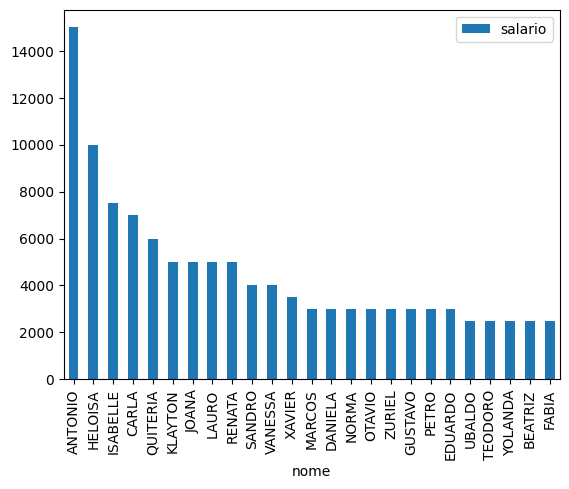

In [127]:
nome_salario = df.sort_values(by='salario', ascending=False)
nome_salario.plot.bar(x='nome', y='salario')

<Axes: ylabel='nome'>

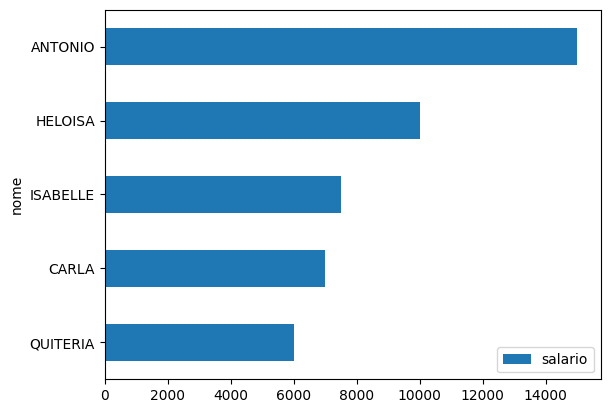

In [128]:
# top 5 salários
nome_salario[:5].sort_values(by='salario', ascending=True).plot.barh(x='nome', y='salario')

<Axes: title={'center': 'Pessoas por Setor'}, ylabel='nome'>

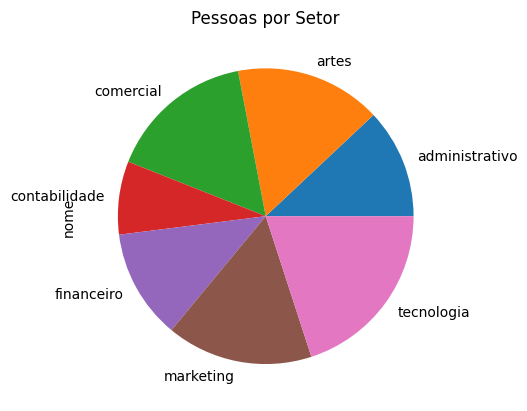

In [129]:
# representatividade das áreas no conjunto de pessoas 
df[['setor', 'nome']].groupby('setor').count().plot.pie(y='nome', 
                                                        legend=False,
                                                        title='Pessoas por Setor')

E para dar somente um gostinho de outras bibliotecas que otimisa o visual gráfico, vou exemplificar utilizando nossos dataframes com as bibliotecas **plotly** e **seaborn** para criar os gráficos. 

## plotly

In [130]:
import plotly.graph_objects as go

In [131]:
vg = vendas[['id_produto', 'total']].groupby('id_produto').sum()
vg

,total
id_produto,
0,1428.82
1,1130.32
2,1048.73
3,1381.06
4,1227.83
5,1114.40
6,1257.68
7,1114.40
8,1199.97


In [132]:
# acima vemos os id_produto no indice do groupby
# como eles representam a descricao dos produtos, entao utilizarei o array produtos
labels = produtos 
valores = vg['total']

fig = go.Figure(data=[go.Pie(labels=labels, values=valores, hole=.3)])
fig.update_layout(title_text="Produtos mais vendidos")
fig.show()

In [133]:
# agora vamos ver o total vendido mes a mes
vg = vendas[['mes', 'total']].groupby('mes').sum()
labels = vg.index # meses 
valores = vg['total']

fig = go.Figure(data=[go.Bar(x=labels, y=valores)])
fig.update_layout(title_text="Vendas por mês", template="plotly_white")
fig.show()

## seaborn

In [134]:
import seaborn as sns

In [135]:
vg = vendas[['id_vendedor', 'total']].groupby('id_vendedor').sum()
vendedores

['JOAO', 'MARIA', 'PEDRO', 'ANA', 'BETO']

<Axes: xlabel='x', ylabel='y'>

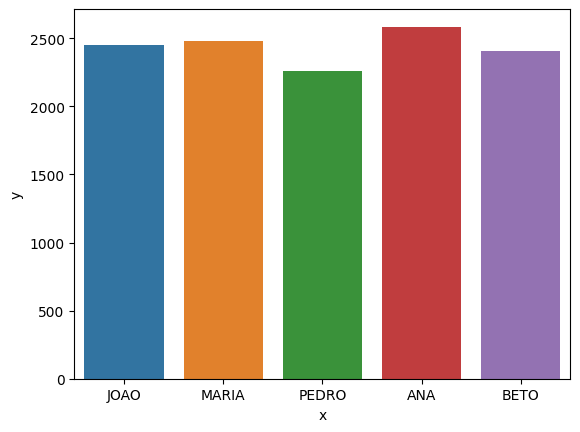

In [136]:
sns.barplot(data=pd.DataFrame({"x":vendedores, "y":vg.values.flatten()}), x="x", y="y")

<Axes: >

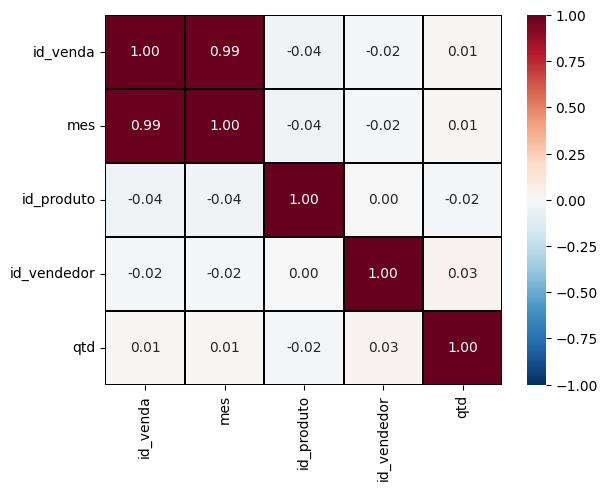

In [137]:
sns.heatmap(correlacao, annot=True, fmt='.2f', vmin=-1, vmax=1, 
            linewidth=0.01, linecolor='black', cmap='RdBu_r')